<a href="https://colab.research.google.com/github/DostdarDost/Generative-AI-Model/blob/main/Metric_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

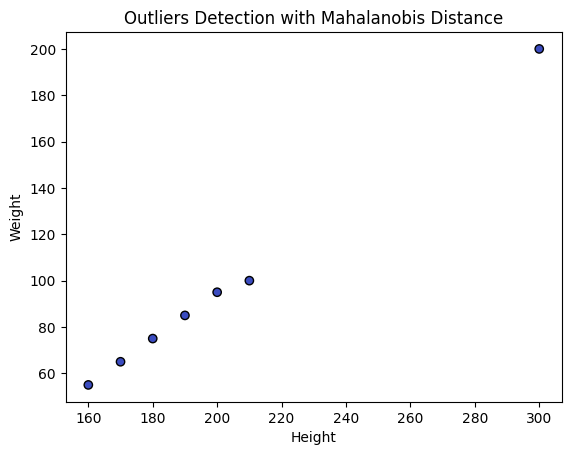

   Height  Weight  Mahalanobis_Dist  Outlier
0     160      55          1.067565    False
1     170      65          0.809877    False
2     180      75          0.552189    False
3     190      85          0.294501    False
4     200      95          0.036813    False
5     210     100          2.214882    False
6     300     200          2.214882    False


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Step 1: Load a real dataset (e.g., from seaborn, sklearn, or a CSV file)
# For example, using a synthetic dataset for simplicity here
# You can replace it with your dataset like: pd.read_csv('your_dataset.csv')
data = pd.DataFrame({
    'Height': [160, 170, 180, 190, 200, 210, 300],  # Anomalous height at 300
    'Weight': [55, 65, 75, 85, 95, 100, 200]        # Anomalous weight at 200
})

# Step 2: Calculate mean vector and covariance matrix
mean_vector = np.mean(data, axis=0)
cov_matrix = np.cov(data, rowvar=False)
cov_matrix_inv = np.linalg.inv(cov_matrix)

# Step 3: Mahalanobis distance function
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))

# Step 4: Compute Mahalanobis distance for each observation
distances = []
for i in range(len(data)):
    x = data.iloc[i].values
    dist = mahalanobis_distance(x, mean_vector, cov_matrix_inv)
    distances.append(dist)

data['Mahalanobis_Dist'] = distances

# Step 5: Define the threshold for identifying outliers (Chi-square distribution)
threshold = chi2.ppf((1 - 0.01), df=2)  # 99% confidence level, df = number of variables (Height, Weight)
data['Outlier'] = data['Mahalanobis_Dist'] > np.sqrt(threshold)

# Step 6: Plot the results (optional)
plt.scatter(data['Height'], data['Weight'], c=data['Outlier'], cmap='coolwarm', edgecolors='k')
plt.title('Outliers Detection with Mahalanobis Distance')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Step 7: View the data with Mahalanobis distance and outlier flag
print(data)


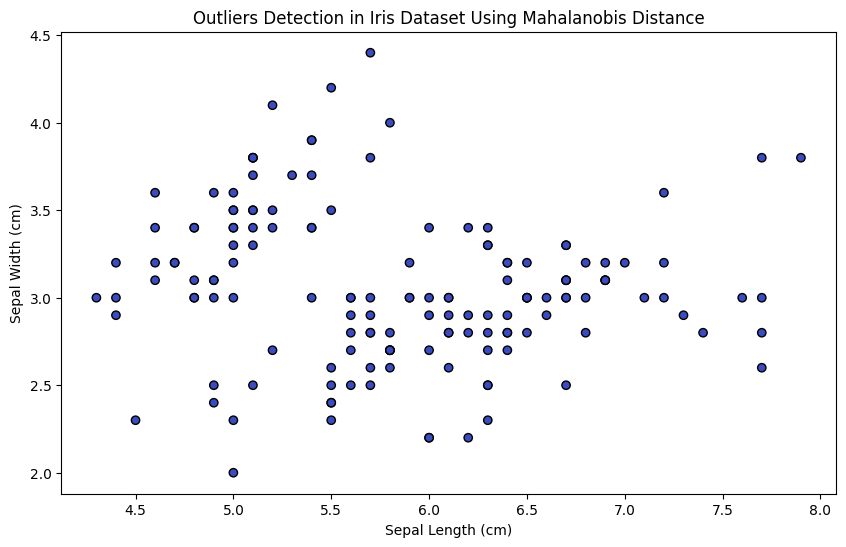

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Mahalanobis_Dist  Outl

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Calculate mean vector and covariance matrix
mean_vector = np.mean(data, axis=0)
cov_matrix = np.cov(data, rowvar=False)
cov_matrix_inv = np.linalg.inv(cov_matrix)

# Step 3: Mahalanobis distance function
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))

# Step 4: Compute Mahalanobis distance for each observation
distances = []
for i in range(len(data)):
    x = data.iloc[i].values
    dist = mahalanobis_distance(x, mean_vector, cov_matrix_inv)
    distances.append(dist)

data['Mahalanobis_Dist'] = distances

# Step 5: Define the threshold for identifying outliers (Chi-square distribution)
threshold = chi2.ppf((1 - 0.01), df=4)  # 99% confidence level, df = number of features (4 features in Iris dataset)
data['Outlier'] = data['Mahalanobis_Dist'] > np.sqrt(threshold)

# Step 6: Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['Outlier'], cmap='coolwarm', edgecolors='k')
plt.title('Outliers Detection in Iris Dataset Using Mahalanobis Distance')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Step 7: View the data with Mahalanobis distance and outlier flag
print(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Mahalanobis_Dist', 'Outlier']])


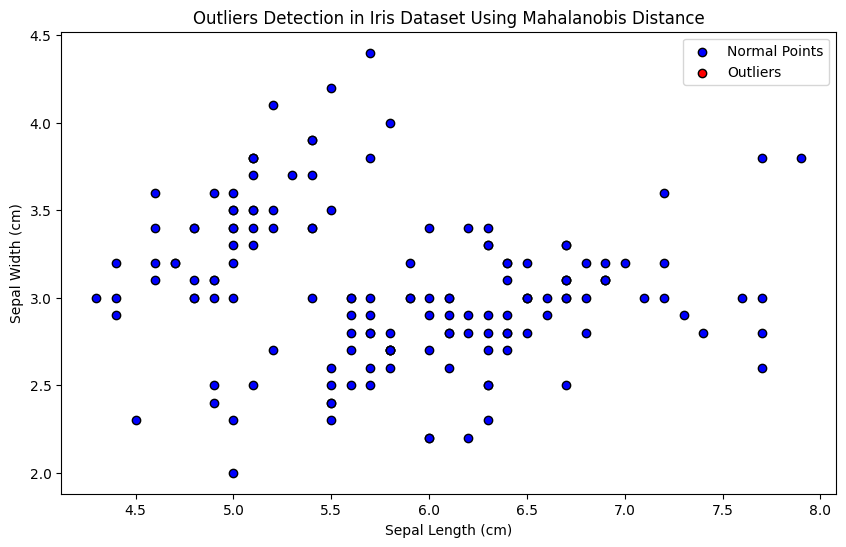

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Mahalanobis_Dist  Outl

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [4]:

# Step 1: Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Step 2: Calculate mean vector and covariance matrix
mean_vector = np.mean(data, axis=0)
cov_matrix = np.cov(data, rowvar=False)
cov_matrix_inv = np.linalg.inv(cov_matrix)

In [5]:
mean_vector

,0
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


In [6]:
cov_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

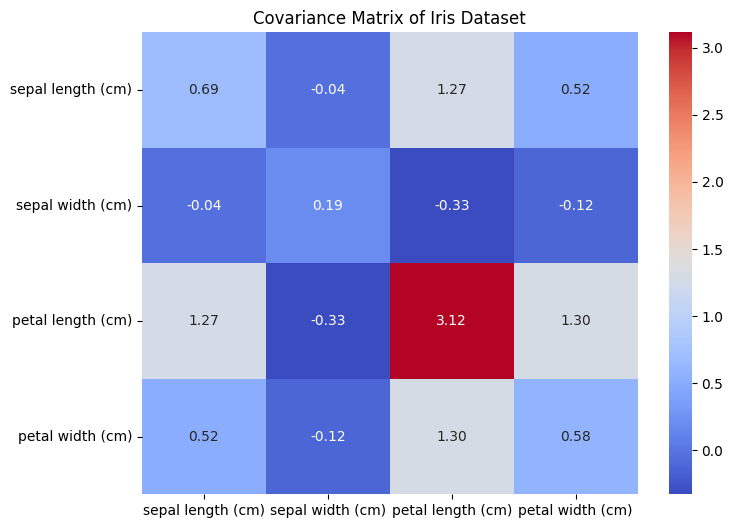

In [8]:
# prompt: show the cov_matrix in plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=data.columns, yticklabels=data.columns)
plt.title('Covariance Matrix of Iris Dataset')
plt.show()


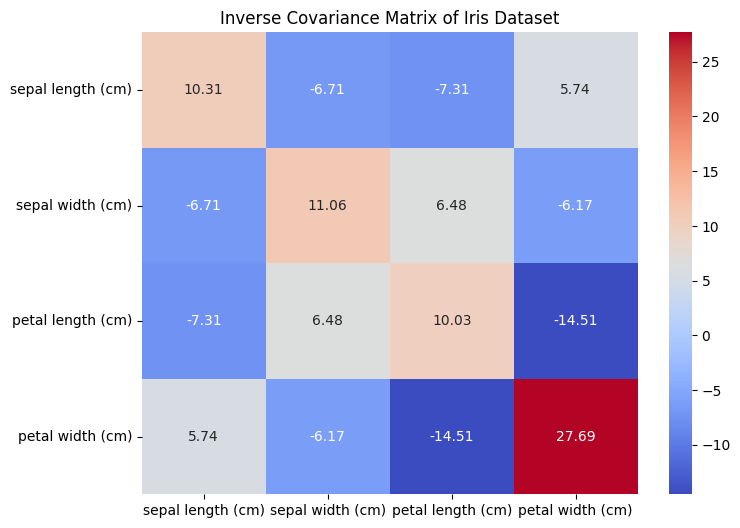

In [9]:
# prompt: plot inve covarmatix

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix_inv, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=data.columns, yticklabels=data.columns)
plt.title('Inverse Covariance Matrix of Iris Dataset')
plt.show()


In [ ]:
# Step 3: Mahalanobis distance function
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))



In [ ]:
# Step 4: Compute Mahalanobis distance for each observation
distances = []
for i in range(len(data)):
    x = data.iloc[i].values
    dist = mahalanobis_distance(x, mean_vector, cov_matrix_inv)
    distances.append(dist)

data['Mahalanobis_Dist'] = distances



In [ ]:
# Step 5: Define the threshold for identifying outliers (Chi-square distribution)
threshold = chi2.ppf((1 - 0.02), df=4)  # 99% confidence level, df = number of features (4 features in Iris dataset)
data['Outlier'] = data['Mahalanobis_Dist'] > np.sqrt(threshold)



In [ ]:
# Step 6: Plot the results (Outliers in red, normal points in blue)
plt.figure(figsize=(10, 6))



In [ ]:
# Plot normal points
plt.scatter(data.loc[~data['Outlier'], 'sepal length (cm)'],
            data.loc[~data['Outlier'], 'sepal width (cm)'],
            color='blue', label='Normal Points', edgecolors='k')

# Plot outliers
plt.scatter(data.loc[data['Outlier'], 'sepal length (cm)'],
            data.loc[data['Outlier'], 'sepal width (cm)'],
            color='red', label='Outliers', edgecolors='k')

plt.title('Outliers Detection in Iris Dataset Using Mahalanobis Distance')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Step 7: View the data with Mahalanobis distance and outlier flag
print(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Mahalanobis_Dist', 'Outlier']])


In [11]:
# prompt: select any outliner dataset from any bulit in dataset

import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston # Removed in scikit-learn v1.2
import seaborn as sns
from sklearn.datasets import fetch_california_housing # Use this dataset instead of load_boston

# Step 1: Load the California Housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target variable to the DataFrame
data['target'] = housing.target

# Step 2: Calculate mean vector and covariance matrix
mean_vector = np.mean(data, axis=0)
cov_matrix = np.cov(data, rowvar=False)
cov_matrix_inv = np.linalg.inv(cov_matrix)

# Step 3: Mahalanobis distance function
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, cov_inv), diff))

# Step 4: Compute Mahalanobis distance for each observation
distances = []
for i in range(len(data)):
    x = data.iloc[i].values
    dist = mahalanobis_distance(x, mean_vector, cov_matrix_inv)
    distances.append(dist)

data['Mahalanobis_Dist'] = distances

# Step 5: Define the threshold for identifying outliers (Chi-square distribution)
# Updated degrees of freedom to match the number of features in the California Housing dataset
threshold = chi2.ppf((1 - 0.01), df=9)  # 99%

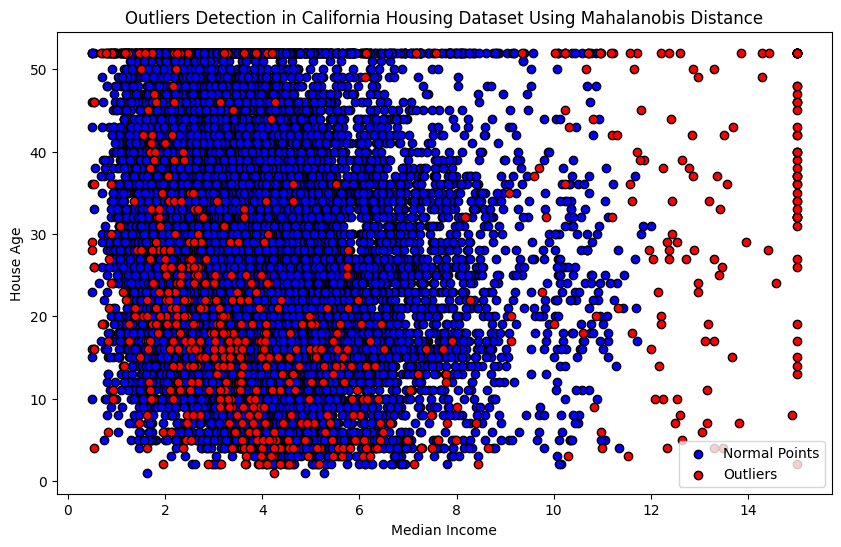

       MedInc  HouseAge  Mahalanobis_Dist  Outlier
0      8.3252      41.0          3.079140    False
1      8.3014      21.0          3.112692    False
2      7.2574      52.0          3.342034    False
3      5.6431      52.0          2.515334    False
4      3.8462      52.0          2.872380    False
...       ...       ...               ...      ...
20635  1.5603      25.0          3.252460    False
20636  2.5568      18.0          3.122142    False
20637  1.7000      17.0          3.144785    False
20638  1.8672      18.0          2.977002    False
20639  2.3886      16.0          2.930552    False

[20640 rows x 4 columns]


In [12]:
# prompt: plot

data['Outlier'] = data['Mahalanobis_Dist'] > np.sqrt(threshold)

# Step 6: Plot the results (optional)
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(data.loc[~data['Outlier'], 'MedInc'],
            data.loc[~data['Outlier'], 'HouseAge'],
            color='blue', label='Normal Points', edgecolors='k')

# Plot outliers
plt.scatter(data.loc[data['Outlier'], 'MedInc'],
            data.loc[data['Outlier'], 'HouseAge'],
            color='red', label='Outliers', edgecolors='k')

plt.title('Outliers Detection in California Housing Dataset Using Mahalanobis Distance')
plt.xlabel('Median Income')
plt.ylabel('House Age')
plt.legend()
plt.show()

# Step 7: View the data with Mahalanobis distance and outlier flag
print(data[['MedInc', 'HouseAge', 'Mahalanobis_Dist', 'Outlier']])
